## Introduction:
Stroke is a primary public health concern, significantly impacting morbidity and mortality worldwide. According to the National Institute of Neurological Disorders and Stroke (NINDS), a stroke is a medical emergency that occurs when blood flow to the brain is interrupted, causing brain cells to die. Stroke is a leading cause of long-term disability and is a significant cause of death worldwide (NINDS, 2023). Machine learning (ML) techniques have become increasingly popular in predicting stroke risk and outcome. Wearable multimodal technologies and various datasets have provided researchers the tools to develop accurate and reliable machine-learning models for stroke risk prediction. ML techniques have also been utilized in predicting long-term outcomes and stroke recurrence in stroke patients, highlighting their potential to improve stroke outcomes.

### Stroke Prediction Dataset Overview
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Data Set Characteristics:

1) **id**: unique identifier
2) **gender**: "Male", "Female" or "Other"
3) **age**: age of the patient
4) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) **ever_married**: "No" or "Yes"
7) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) **Residence_type**: "Rural" or "Urban"
9) **avg_glucose_level**: average glucose level in blood
10) **bmi**: body mass index
11) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) **stroke**: 1 if the patient had a stroke or 0 if not

***Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

### Load Required Python Library

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from boruta import BorutaPy
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display, HTML
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

### Read And Analyze Data

In [2]:
# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5110   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                     │     0 │      0 │   37000 │   21000 │     67 │   18000 │  55000 │  73000 │ █▇▇███  │  │
│ │ age                    │     0 │      0 │      43 │      23 │   0.08 │      25 │     61 │     82 │ ▅▆▇██▆  │  │
│ │ hypertension           │     0 │      0 │   0.097 │     0.3 │      0 │       0 │      0 │      1 │ █    ▁  │  │
│ │ heart_disease          │     0 │      0 │   0.054 │    0.23 │      0 │       0 │      0 │      1 │    █    │  │
│ │ avg_glucose_level      │     0 │      0 │     110 │      45 │     55 │      77 │    110 │    270 │  █▅▁▁▁  │  │
│ │ bmi                    │   200 │    3.9 │      29 │     7.9 │     10 │      24 │     33 │     98 │   ▄█▁   │  │
│ │ stroke                 │     0 │      0 │   0.049 │    0.22 │      0 │       0 │      0 │      1 │    █    │  │
│ └────────────────────────┴───────┴────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                        │      0 │          0 │                           1 │                   5100 │  │
│ │ ever_married                  │      0 │          0 │                           1 │                   5100 │  │
│ │ work_type                     │      0 │          0 │                           1 │                   5100 │  │
│ │ Residence_type                │      0 │          0 │                           1 │                   5100 │  │
│ │ smoking_status                │      0 │          0 │                           1 │                   5100 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Data Cleaning/Preparation

### Removing unnecessary columns

In [7]:
# removing unnecessary columns
df.drop(['id'], inplace = True, axis=1,)

### Checking for duplicates

In [8]:
len(df[df.duplicated()])

0

### Checking for rows with missing values

In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
print(f"Number of cells with missing values: {df.isna().sum().sum()}")
print(f"Percentage of cells with missing values: {df.isna().sum().sum()/len(df)*100:.0f}%")
print(f"Number of rows with missing values: {df.shape[0] - df.dropna().shape[0]}")
print(f"Percentage of rows with missing values: {(df.shape[0] - df.dropna().shape[0])/len(df)*100:.0f}%")

Number of cells with missing values: 201
Percentage of cells with missing values: 4%
Number of rows with missing values: 201
Percentage of rows with missing values: 4%


### Removing null values

In [11]:
print("Before Drop Missing Values:", df.shape)
df = df.dropna()
print(" After Drop Missing Values:", df.shape)

Before Drop Missing Values: (5110, 11)
 After Drop Missing Values: (4909, 11)


In [12]:
labels = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le=LabelEncoder()
for label in labels:
    df[label]=le.fit_transform(df[label])

## Exploratory Data Analysis

### Visualizing the Data

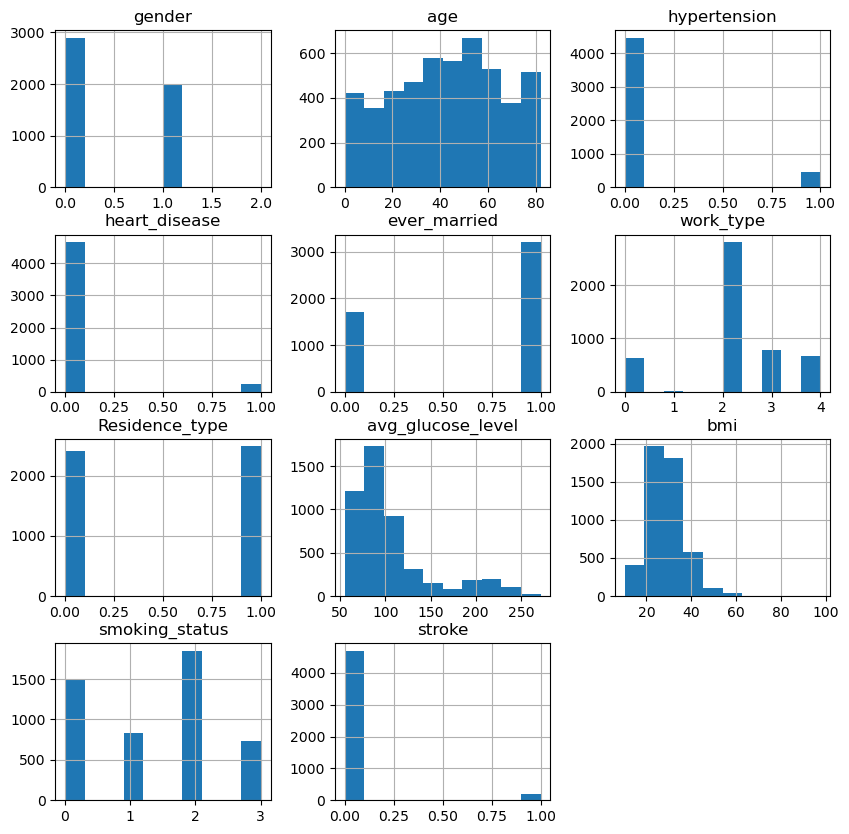

In [13]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### Visualizing Outliers

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4909.0,0.410063,0.492309,0.00,0.00,0.00,1.00,2.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
ever_married,4909.0,0.652679,0.476167,0.00,0.00,1.00,1.00,1.00
work_type,4909.0,2.170096,1.092593,0.00,2.00,2.00,3.00,4.00
Residence_type,4909.0,0.507232,0.499999,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
smoking_status,4909.0,1.375433,1.067322,0.00,0.00,2.00,2.00,3.00


In [15]:
outliers = ['avg_glucose_level', 'bmi']

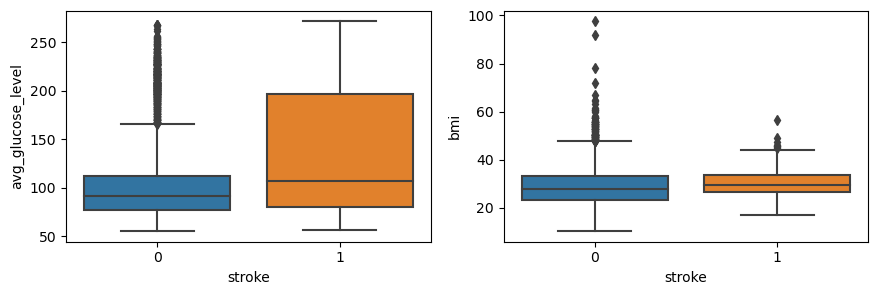

In [16]:
# Visually observe the outliers in each column
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in outliers:
    plt.subplot(3,3,i)
    sns.boxplot(data=df, x='stroke', y=col_name)
    i +=1

In [17]:
# creating variable for outliers calculation
outliers_var = df[outliers]
IQR= outliers_var.quantile(0.75)- outliers_var.quantile(0.25)
Q1 = outliers_var.quantile(0.25)-1.5*IQR
Q3 = outliers_var.quantile(0.75)+1.5*IQR

In [18]:
outliers_var

,avg_glucose_level,bmi
0,228.69,36.6
2,105.92,32.5
3,171.23,34.4
4,174.12,24.0
5,186.21,29.0
...,...,...
5104,103.08,18.6
5106,125.20,40.0
5107,82.99,30.6
5108,166.29,25.6


In [19]:
# review the total of outliers per column
((outliers_var  < (Q1)) | (outliers_var  > (Q3))).sum()

avg_glucose_level    567
bmi                  110
dtype: int64

In [20]:
outliers_rate = ((outliers_var  < (Q1)) | (outliers_var  > (Q3))).sum().sum()/len(df)*100
print(f"{outliers_rate:.0f}%")

14%


### Visualizing the Correlations

In [21]:
def plot_features_corr(data,features):
    """plot the correlation between features"""
    corr = data[features].corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, annot=True, cmap= 'coolwarm')

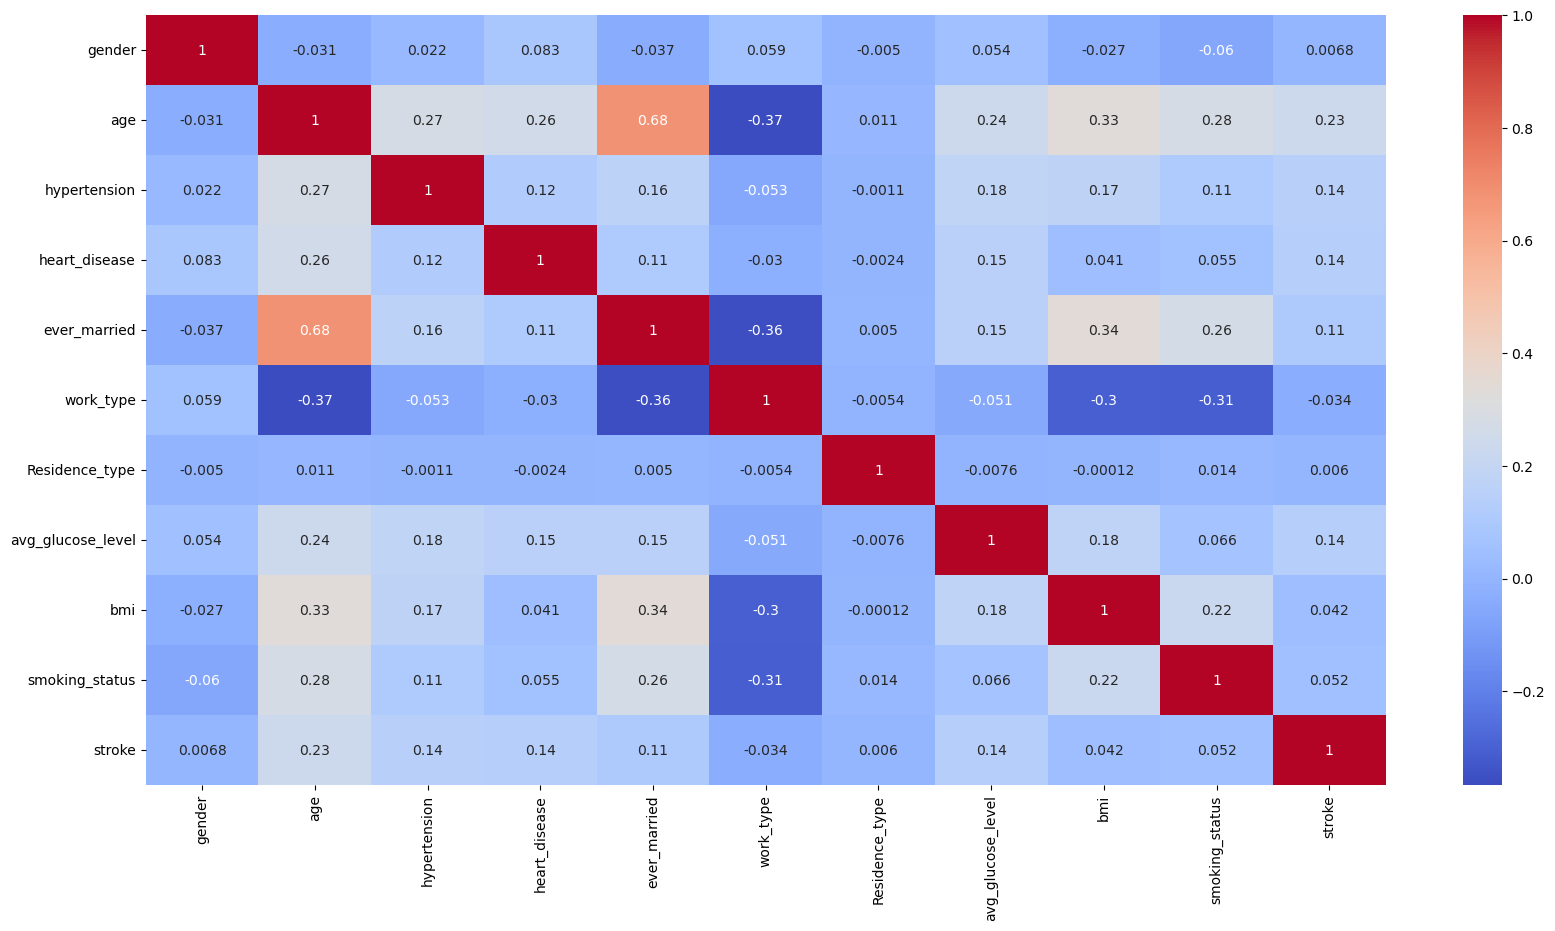

In [22]:
# Visually observe the correlations in each column
plot_features_corr(df,df.columns)

## Model Selection

### Analysis of stroke (Target Variable)

A Count plot and a Pie chart will be two useful plots to analyse the `stroke` column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

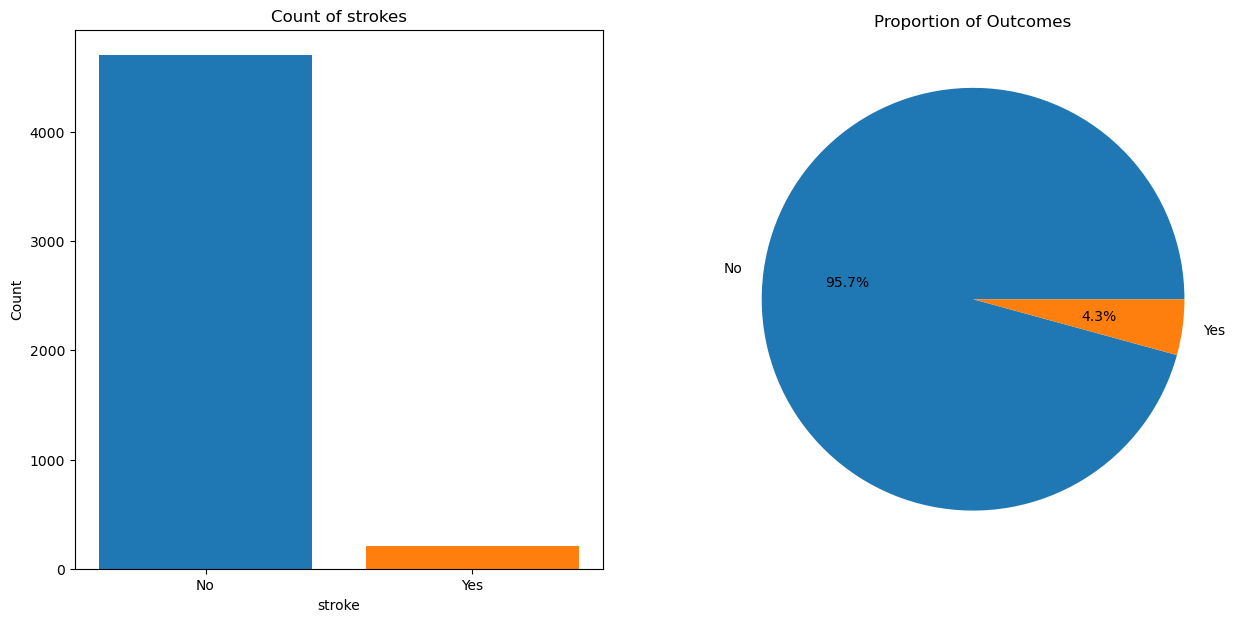

In [23]:
# Extract default colors
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot count plot on first axis
ax[0].bar([0, 1], df["stroke"].value_counts(), color=[colors[0], colors[1]])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["No", "Yes"])
ax[0].set_xlabel("stroke")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of strokes")

# Plot pie chart on second axis
values = df["stroke"].value_counts()
labels = ["No", "Yes"]
explode = [0.1, 0]
colors = ["blue", "orange"]
ax[1].pie(values, labels=labels, autopct="%1.1f%%")
ax[1].set_title("Proportion of Outcomes")

# Display the plot
plt.show()

The above plot shows that:

- **95.7% patients in the dataset do NOT have 10 year risk of coronary heart disease.**
- **4.3% patients in the dataset has 10 year risk of coronary heart disease.** 

Which is imbalanced result.

#### Rebalance Data

In [24]:
data_major = df[(df['stroke']==0)]
data_minor = df[(df['stroke']==1)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = len(data_major),
                    random_state= 42)
df = pd.concat([upsample, data_major])

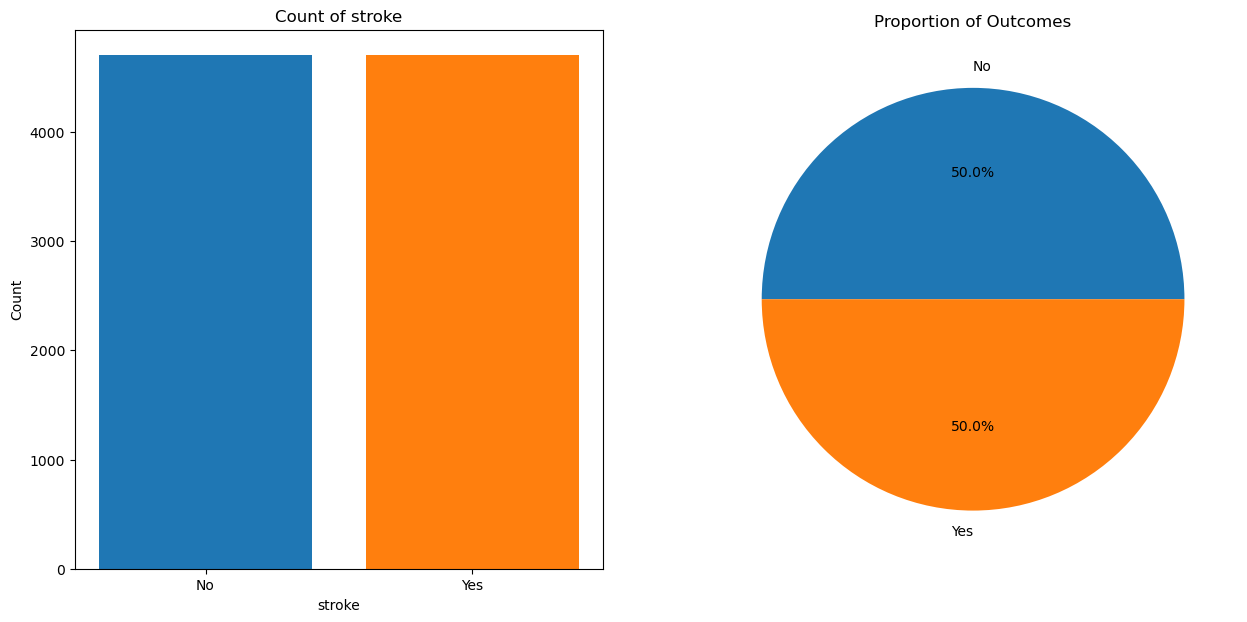

In [25]:
# Extract default colors
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot count plot on first axis
ax[0].bar([0, 1], df["stroke"].value_counts(), color=[colors[0], colors[1]])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["No", "Yes"])
ax[0].set_xlabel("stroke")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of stroke")

# Plot pie chart on second axis
values = df["stroke"].value_counts()
labels = ["No", "Yes"]
explode = [0.1, 0]
colors = ["blue", "orange"]
ax[1].pie(values, labels=labels, autopct="%1.1f%%")
ax[1].set_title("Proportion of Outcomes")

# Display the plot
plt.show()

## Split the data into train and test sets

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("stroke", axis=1), df["stroke"], test_size=0.2)

In [27]:
X_train.shape

(7520, 10)

In [28]:
X_test.shape

(1880, 10)

## Normalize the data

In [29]:
# Normalization
# sc = StandardScaler()
sc = MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

## Train and evaluate different models

In [30]:
def display_score(data):
    # create a DataFrame
    df = pd.DataFrame(data)

    # apply some styles
    styled_df = df.style.set_properties(**{'text-align': 'center'}) \
                        .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightblue')]}]) \
                        .hide_index()

    # format numerical values to two decimal places
    styled_df = styled_df.format('{:.2f}', subset=pd.IndexSlice[:, ['accuracy', 'precision', 'recall', 'f1', 'run-time']])

    # display the styled DataFrame
    return styled_df


In [31]:
def display_tables_side_by_side(t1, title1, t2, title2):
    title1 = f'<h2 align="center">{title1}</h2>'
    title2 = f'<h2 align="center">{title2}</h2>'
    # add captions to each table
    t1 = t1.set_caption(title1)
    t2 = t2.set_caption(title2)

    # combine the HTML tables side by side with some space in between
    html = '<div style="display: flex;">' + t1.render() + '<div style="width: 20px;"></div>' + t2.render() + '</div>'

    # display the combined tables
    display(HTML(html))



In [32]:
def train_evaluate_model(name, model,X_train,y_train,X_test,y_test, score):
    start = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    end = time.time()
    run_time = round(end-start, 2)
    score["model"].append(name)
    score["accuracy"].append(round(accuracy*100,2))
    score["precision"].append(round(precision*100,2))
    score["recall"].append(round(recall*100,2))
    score["f1"].append(round(f1*100,2))
    score["run-time"].append(round(run_time,2))
    
    print(f"Model : {name}")
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("------------------------------------------")
    

In [33]:
def train_evaluate_model_gridsearch(name, model, param_grid, X_train,y_train,X_test,y_test, nfolds, score):
    start = time.time()
    estimator = model.fit(X_train, y_train)
    grid_search = GridSearchCV(cv=nfolds, estimator=estimator, param_grid=param_grid)
    grid_search.fit(X_train, y_train)
    # Get the best model and test its accuracy on the testing data
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    end = time.time()
    run_time = round(end-start, 2)
    score["model"].append(name)
    score["accuracy"].append(round(accuracy*100,2))
    score["precision"].append(round(precision*100,2))
    score["recall"].append(round(recall*100,2))
    score["f1"].append(round(f1*100,2))
    score["run-time"].append(round(run_time,2))

    print(f"Model : {name}")
    print("Grid best params: ", grid_search.best_params_)
    print("Accuracy : %s" % "{0:.3%}".format(grid_search.best_score_))
    print("Run time : %s" % "{0:.3}".format(end-start))
    print("----------------------------------------------------")
    return best_model

In [34]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
svc = SVC()
xgb = XGBClassifier()
rf = RandomForestClassifier()
estimators = [('lr', lr), ('knn', knn), ('dt', dt)]
st = StackingClassifier(estimators=estimators, final_estimator=lr)
Models = {
    'LogisticRegression': lr,
    'KNeighbors': knn,
    'DecisionTree': dt,
#     'SVC': svc,
#     'XGB': xgb,
#     'RandomForest': rf
    'Stacking': st
}

## Create feature selection

In [35]:
# select_feature = SelectKBest(f_classif, k=5).fit(X_train, y_train)
# X_train_norm_selected = select_feature.transform(X_train_norm)
# X_test_norm_selected = select_feature.transform(X_test_norm)

# Create a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=4)
# Create a boruta feature selector
select_feature = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=42)

# Fit the RFE object to the training data
fit = select_feature.fit(X_train_norm, y_train)
# Transform the training and testing data to include only the selected features
X_train_norm_selected = fit.transform(X_train_norm)
X_test_norm_selected = fit.transform(X_test_norm)



## Train and evaluate different models with and without feature selection

In [36]:
score_norm_selected = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm_selected,y_train,X_test_norm_selected,y_test, score_norm_selected)

Model : LogisticRegression
Accuracy : 78.191%
Run time : 0.187
------------------------------------------
Model : KNeighbors
Accuracy : 93.723%
Run time : 0.592
------------------------------------------
Model : DecisionTree
Accuracy : 97.553%
Run time : 0.0578
------------------------------------------
Model : Stacking
Accuracy : 99.096%
Run time : 3.34
------------------------------------------


In [37]:
score_norm = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm,y_train,X_test_norm,y_test, score_norm)

Model : LogisticRegression
Accuracy : 78.617%
Run time : 0.433
------------------------------------------
Model : KNeighbors
Accuracy : 93.351%
Run time : 0.397
------------------------------------------
Model : DecisionTree
Accuracy : 97.819%
Run time : 0.048
------------------------------------------
Model : Stacking
Accuracy : 99.362%
Run time : 2.21
------------------------------------------


In [38]:
display_score(score_norm_selected)
t1 = display_score(score_norm)
t2 = display_score(score_norm_selected)
display_tables_side_by_side(t1, "Without Feature Selection", t2, "With Feature Selection")

model,accuracy,precision,recall,f1,run-time
LogisticRegression,78.62,75.89,82.79,79.19,0.43
KNeighbors,93.35,88.08,100.00,93.66,0.40
DecisionTree,97.82,95.75,100.00,97.83,0.05
Stacking,99.36,98.72,100.00,99.35,2.21
model,accuracy,precision,recall,f1,run-time
LogisticRegression,78.19,75.50,82.36,78.78,0.19
KNeighbors,93.72,88.68,100.00,94.00,0.59
DecisionTree,97.55,95.26,100.00,97.57,0.06
Stacking,99.10,98.19,100.00,99.09,3.34


## Improve models with GridSearchCV

In [39]:
Cs = []
for i in range(-5, 6):
    Cs.append(2**i)
param_grids = {
    'LogisticRegression': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}, 
    'KNeighbors': {
        'n_neighbors': range(3,32),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'DecisionTree': { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 32), 'min_samples_leaf': np.arange(1, 32)},
    'SVC': {'C': Cs, 'gamma': Cs, 'kernel': ['rbf']},
    'XGB': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'RandomForest': { 
        'n_estimators': [10, 50, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : np.arange(3, 32),
        'criterion' :['gini', 'entropy']
    },
    'Stacking': {
        "lr__C":np.logspace(-3,3,7), 
        "lr__penalty":["l1","l2"],
        "knn__n_neighbors": range(3,32),
        "knn__weights": ['uniform', 'distance'],
        "knn__metric": ['euclidean', 'manhattan'],
        "dt__criterion":['gini','entropy'],
        "dt__max_depth": np.arange(3, 32), 
        "dt__min_samples_leaf": np.arange(1, 32),
        "final_estimator": [LogisticRegression(C=0.1),
        LogisticRegression(C=1),
        LogisticRegression(C=10)],
        "passthrough": [True, False]
    }
}


## Compare models with and without selection after GridSearchCV

In [40]:
estimators = []
score_norm_grid_selected = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[]}
grid_search_models = dict()
for name in Models:
    if name != "Stacking":
        model = Models[name]
        param_grid = param_grids[name]
        grid_search_models[name] = train_evaluate_model_gridsearch(name,model,param_grid,X_train_norm_selected,y_train,
                                    X_test_norm_selected,y_test,5,score_norm_grid_selected)
        estimators.append((name, grid_search_models[name]))

st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
train_evaluate_model("Stacking", st, X_train_norm_selected,y_train,X_test_norm_selected,y_test, score_norm_grid_selected)

Model : LogisticRegression
Grid best params:  {'C': 1.0, 'penalty': 'l2'}
Accuracy : 76.941%
Run time : 2.14
----------------------------------------------------
Model : KNeighbors
Grid best params:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy : 95.027%
Run time : 59.8
----------------------------------------------------
Model : DecisionTree
Grid best params:  {'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 1}
Accuracy : 97.380%
Run time : 1.31e+02
----------------------------------------------------
Model : Stacking
Accuracy : 99.309%
Run time : 0.689
------------------------------------------


In [41]:
estimators = []
score_norm_grid = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[]}
grid_search_models = dict()
for name in Models:
    if name != "Stacking":
        model = Models[name]
        param_grid = param_grids[name]
        grid_search_models[name] = train_evaluate_model_gridsearch(name,model,param_grid,X_train_norm,y_train,X_test_norm,y_test,5,score_norm_grid)
        estimators.append((name, grid_search_models[name]))

st = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
train_evaluate_model("Stacking", st, X_train_norm,y_train,X_test_norm,y_test, score_norm_grid)

Model : LogisticRegression
Grid best params:  {'C': 1.0, 'penalty': 'l2'}
Accuracy : 77.088%
Run time : 1.53
----------------------------------------------------
Model : KNeighbors
Grid best params:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy : 94.907%
Run time : 58.6
----------------------------------------------------
Model : DecisionTree
Grid best params:  {'criterion': 'gini', 'max_depth': 22, 'min_samples_leaf': 1}
Accuracy : 97.407%
Run time : 1.48e+02
----------------------------------------------------
Model : Stacking
Accuracy : 99.362%
Run time : 1.38
------------------------------------------


In [42]:
t1 = display_score(score_norm_grid)
t2 = display_score(score_norm_grid_selected)
display_tables_side_by_side(t1, "Without Feature Selection", t2, "With Feature Selection")

model,accuracy,precision,recall,f1,run-time
LogisticRegression,78.62,75.89,82.79,79.19,1.53
KNeighbors,95.59,91.76,100.00,95.70,58.63
DecisionTree,97.71,95.55,100.00,97.73,148.37
Stacking,99.36,98.72,100.00,99.35,1.38
model,accuracy,precision,recall,f1,run-time
LogisticRegression,78.19,75.50,82.36,78.78,2.14
KNeighbors,95.90,92.31,100.00,96.00,59.82
DecisionTree,97.55,95.26,100.00,97.57,131.00
Stacking,99.31,98.61,100.00,99.30,0.69


In [43]:
score_norm_grid

{'model': ['LogisticRegression', 'KNeighbors', 'DecisionTree', 'Stacking'],
 'accuracy': [78.62, 95.59, 97.71, 99.36],
 'precision': [75.89, 91.76, 95.55, 98.72],
 'recall': [82.79, 100.0, 100.0, 100.0],
 'f1': [79.19, 95.7, 97.73, 99.35],
 'run-time': [1.53, 58.63, 148.37, 1.38]}

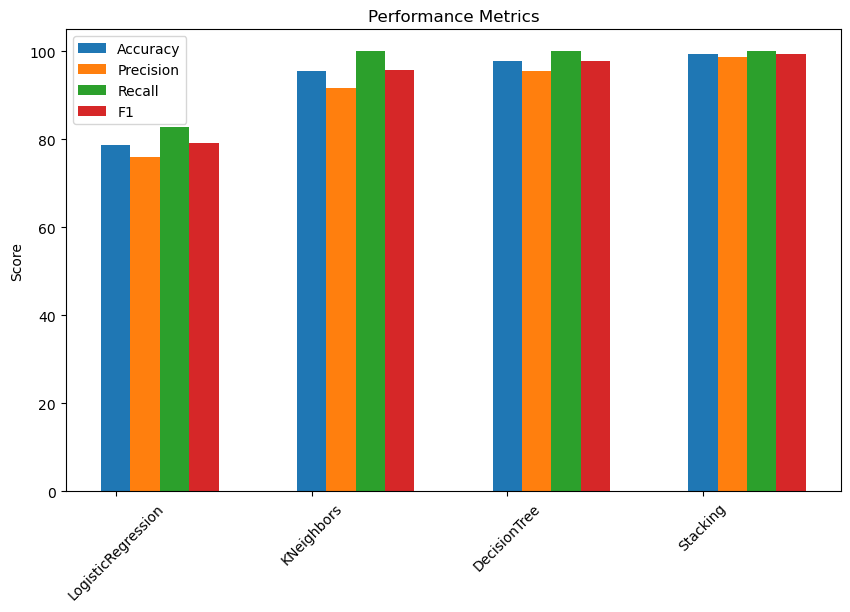

In [44]:
# set up the data
model = score_norm_grid['model']
accuracy = score_norm_grid['accuracy']
precision = score_norm_grid['precision']
recall = score_norm_grid['recall']
f1 = score_norm_grid['f1']
# run_time = score_norm_grid['run-time']

# set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Performance Metrics')
ax.set_ylabel('Score')
ax.set_xticklabels(model, rotation=45)

# plot the bars
ax.bar(model, accuracy, width=0.15, label='Accuracy')
ax.bar([x + 0.15 for x in range(len(model))], precision, width=0.15, label='Precision')
ax.bar([x + 0.3 for x in range(len(model))], recall, width=0.15, label='Recall')
ax.bar([x + 0.45 for x in range(len(model))], f1, width=0.15, label='F1')
# ax.bar([x + 0.6 for x in range(len(model))], run_time, width=0.15, label='Run Time')

# add the legend
ax.legend()

plt.show()

In conclusion, this study examined various ML algorithms for predicting CHD in patients using the Cardiovascular Study Dataset from Kaggle. Feature selection and hyperparameter tuning were also explored to enhance the models' performance. The results showed that SVC and RF classifiers achieved the highest accuracy, with and without feature selection, highlighting the importance of model optimization. The study's exploration of feature selection techniques demonstrated its potential to improve accuracy and build more interpretable models. Overall, this study supports the potential of ML algorithms for CHD prediction and underscores the significance of feature selection and hyperparameter tuning. Future research can explore other feature selection methods, incorporate additional datasets, and investigate DL techniques for CHD prediction.